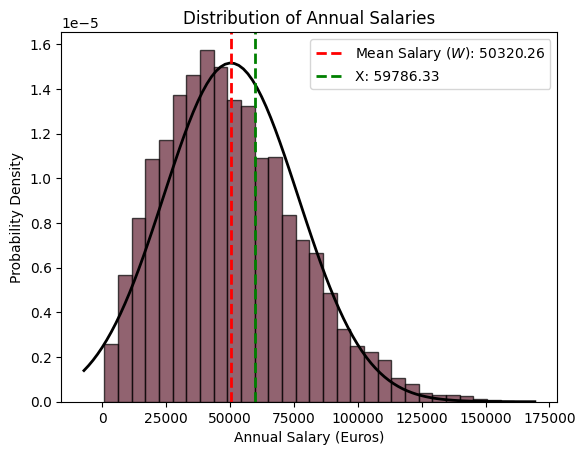

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Read the data from the CSV file 
data = pd.read_csv('data1-1 (1).csv', header=None, names=['Salary'])

# Plot the histogram
plt.hist(data['Salary'], bins=30, density=True, alpha=0.7, color='#632134', edgecolor='black')

# Fit a normal distribution to the data
mu, std = norm.fit(data['Salary'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)

# Calculate and print the mean annual salary (W)
mean_salary = np.mean(data['Salary'])
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary ($W$): {mean_salary:.2f}')

# Calculate and print the value X
X = np.percentile(data['Salary'], 67)  # 100% - 33% = 67%
plt.axvline(X, color='green', linestyle='dashed', linewidth=2, label=f'X: {X:.2f}')

# Add labels, title, and legend
plt.xlabel('Annual Salary (Euros)')
plt.ylabel('Probability Density')
plt.title('Distribution of Annual Salaries')
plt.legend()

# Show the plot
plt.show()